# 7400 Data Visualization
## ColorExpert Group project | Traffic Accidents Data Processing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/Accident_US_2019.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953630 entries, 0 to 953629
Data columns (total 50 columns):
Unnamed: 0               953630 non-null int64
ID                       953630 non-null object
Source                   953630 non-null object
TMC                      691922 non-null float64
Severity                 953630 non-null int64
Start_Time               953630 non-null object
End_Time                 953630 non-null object
Start_Lat                953630 non-null float64
Start_Lng                953630 non-null float64
End_Lat                  261708 non-null float64
End_Lng                  261708 non-null float64
Distance(mi)             953630 non-null float64
Description              953629 non-null object
Number                   354730 non-null float64
Street                   953630 non-null object
Side                     953630 non-null object
City                     953611 non-null object
County                   953630 non-null object
State               

### Add an attribute for indentifing there is any traffic indication or not.

In [4]:
#default value is false
df['traffic_poi'] = False

#find all instances with traffic indication.
roadremind = ['Amenity','Bump','Crossing','Give_Way','Junction',
              'No_Exit','Railway','Roundabout','Station','Stop',
              'Traffic_Calming','Traffic_Signal','Turning_Loop']
rreminddf = pd.DataFrame()
for i in roadremind:
    reminddf = df[df[i] == True]
    rreminddf = pd.concat([rreminddf, reminddf])
rreminddf.drop_duplicates(inplace=True)

In [10]:
# find all instances without traffic indication.
noremind = df.drop(rreminddf.index)

In [11]:
#Set traffic_poi as True for the instances with traffic indication.
rreminddf['traffic_poi'] = True

In [26]:
#rreminddf.head(10)

In [25]:
newdf = rreminddf.append(noremind)

In [26]:
newdf = newdf.sort_index()

In [27]:
newdf.head()

,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,traffic_poi
0,512224,A-512230,MapQuest,201.0,2,2019-12-25 09:49:34,2019-12-25 11:03:57,41.848064,-71.062386,NaN,...,False,False,False,False,False,Day,Day,Day,Day,False
1,512225,A-512231,MapQuest,201.0,2,2019-12-25 12:52:38,2019-12-25 13:37:03,42.660690,-71.192589,NaN,...,False,False,False,False,False,Day,Day,Day,Day,False
2,512226,A-512232,MapQuest,201.0,2,2019-12-25 20:43:26,2019-12-25 21:58:45,42.157021,-71.069061,NaN,...,False,False,False,False,False,Night,Night,Night,Night,False
3,512227,A-512233,MapQuest,201.0,2,2019-12-25 20:57:28,2019-12-25 22:07:34,42.338776,-71.276962,NaN,...,False,False,False,False,False,Night,Night,Night,Night,True
4,512228,A-512234,MapQuest,201.0,3,2019-12-25 07:17:49,2019-12-25 08:49:18,42.379570,-83.200256,NaN,...,False,False,False,False,False,Night,Night,Day,Day,False


In [31]:
#newdf.to_csv('../data/new_ccident_US_2019.csv')

In [32]:
colum_poi = newdf[['ID','traffic_poi']]

In [34]:
#colum_poi.to_csv('../data/newcolum.csv')

### Bulid a new dataset for traffic poi

In [4]:
newset = pd.read_csv('../data/new_ccident_US_2019.csv')

In [5]:
roadremind = ['Amenity','Bump','Crossing','Give_Way','Junction',
              'No_Exit','Railway','Roundabout','Station','Stop',
              'Traffic_Calming','Traffic_Signal','Turning_Loop']

In [17]:
countpois =[]
poisevmean = []
for poi in roadremind:
    poiset = newset[newset[poi] == True]
    countpoi = poiset.count()[poi]
    countpois.append(countpoi)
    sevmean = poiset['Severity'].mean()
    poisevmean.append(round(sevmean,4))

In [10]:
#countpois

In [9]:
#poisevmean

In [20]:
poidf = pd.DataFrame({'Poiname':roadremind,'Number':countpois,'Severity_mean':poisevmean})

In [24]:
poidf = poidf.fillna(0)

In [25]:
poidf.to_csv('../data/poidf.csv')

### Create calculation matrix

In [11]:
#newset.columns

In [68]:
# Drop or transform non-numerical attributes.

corrdf = newset.drop(['Unnamed: 0','Unnamed: 0.1','Start_Lat', 'Start_Lng','End_Lat','End_Lng',
                      'ID','Source','TMC','Description','Number',
                      'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
                      'Airport_Code', 'Weather_Timestamp','Turning_Loop',
                      'Sunrise_Sunset','Astronomical_Twilight','Nautical_Twilight'],axis=1)

In [69]:
coordf = corrdf.replace(['Day','Night','True','False','R','L'],[1,0,1,0,1,0])

In [12]:
#coordf.head(10)

In [71]:
corr = coordf.corr()

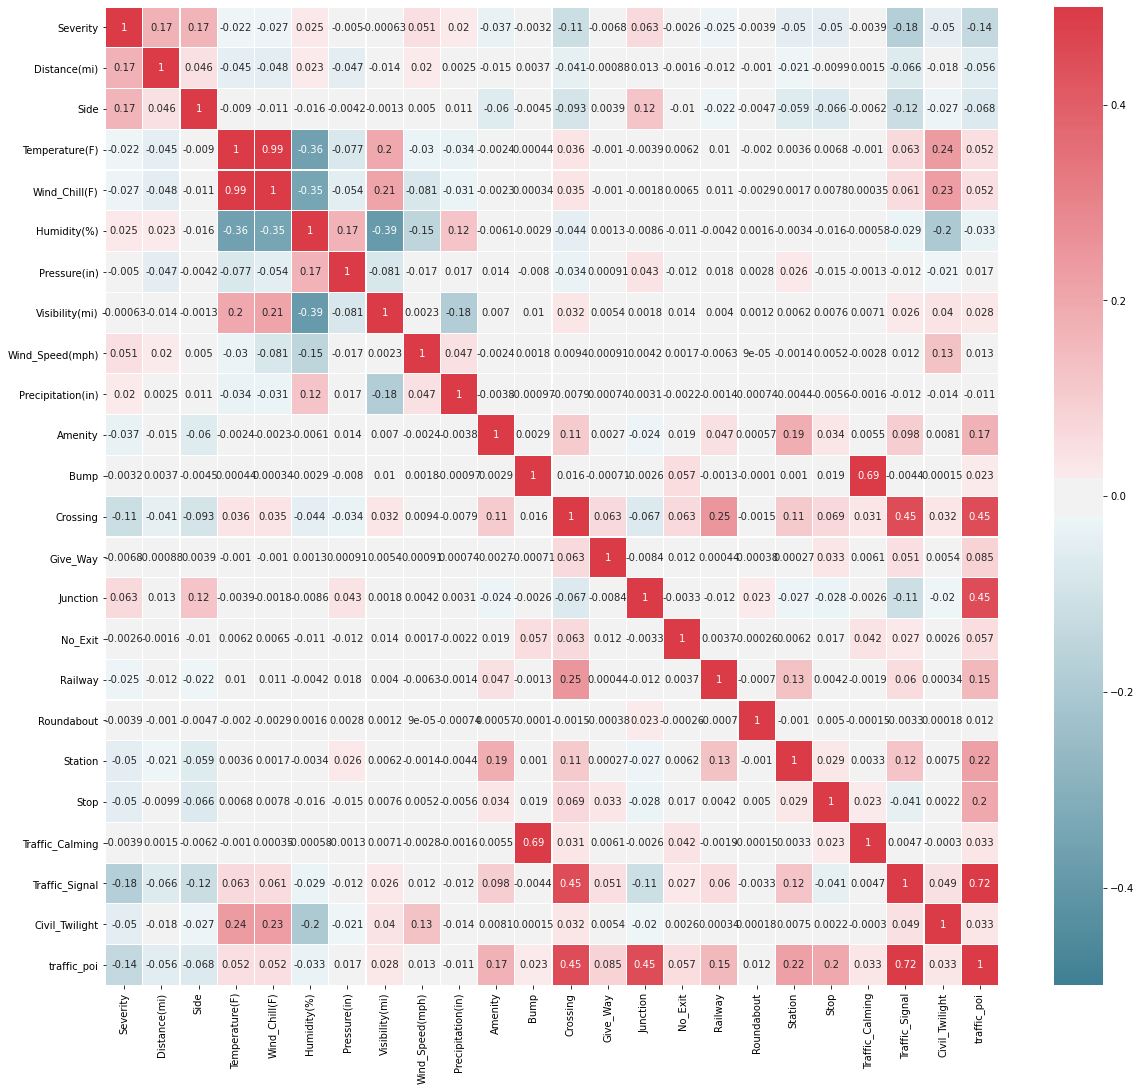

In [79]:
fig1, ax1 = plt.subplots(figsize=(20, 18))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.5, vmin = -0.5,square=False, linewidths=.2, annot=True)